This tool creates ML models with the given datasets to detect video vs. regular browsing.

In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

Our labels, separated by category.

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

Load the dataset.

In [4]:
base_folder = "csv/"
file_name = 'all_60s_1s.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'] + scalogram, inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90', 'up_bytes_silences',
       'up_bytes_silence_mean', 'up_bytes_longest_silence',
       'up_bytes_shortest_silence', 'up_packet_mean', 'up_packet_median',
       'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
       'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75',
       'up_packet_perc90', 'up_packet_silences', 'up_packet_longest_silence',
       'up_packet_shortest_silence', 'down_bytes_mean', 'down_bytes_median',
       'down_bytes_std', 'down_bytes_var', 'down_bytes_skew',
       'down_bytes_kurt', 'down_bytes_perc25', 'down_bytes_perc50',
       'down_bytes_perc75', 'down_bytes_perc90', 'down_bytes_silences',
       'down_bytes_silence_mean', 'down_bytes_longest_silence',
       'down_bytes_shortest_silence', 'down_packet_mean', 'down_packet_median',
 

Choose the labels to consider.

In [5]:
# Join applications from different capture settings
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'netflix_ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube_ssh_', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'acestream_openvpn', 'label'] = 'acestream'

# Video vs. Rest
dataset.loc[dataset['label'] == 'netflix', 'label'] = 'video'
dataset.loc[dataset['label'] == 'youtube', 'label'] = 'video'
dataset.loc[dataset['label'] == 'twitch', 'label'] = 'video'
dataset.loc[dataset['label'] == 'acestream', 'label'] = 'video'

dataset['label'].value_counts()

video       772
browsing    296
Name: label, dtype: int64

In [6]:
import numpy as np
browsing = dataset[dataset['label'] == 'browsing']
video = dataset[dataset['label'] == 'video']
video

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_std,down_packet_var,down_packet_skew,down_packet_kurt,down_packet_perc25,down_packet_perc50,down_packet_perc75,down_packet_perc90,down_packet_silences,label
0,-0.139718,-0.281898,0.233790,0.054658,1.333343,0.136211,-0.295921,-0.281898,-0.073637,0.314001,...,5.995616,35.947412,1.546366,0.829127,-0.431216,-0.401345,4.364799,15.532424,17.0,video
1,-0.276071,-0.295049,0.032408,0.001050,1.590660,1.502811,-0.296113,-0.295049,-0.263711,-0.231787,...,0.744505,0.554288,1.423978,0.441972,-0.431216,-0.424188,0.150385,1.243304,22.0,video
2,-0.256605,-0.294805,0.095595,0.009138,4.300933,19.656430,-0.296113,-0.294805,-0.237131,-0.197308,...,2.426341,5.887131,4.960009,27.471672,-0.431216,-0.422430,1.151935,1.783438,22.0,video
3,-0.251624,-0.294114,0.098331,0.009669,3.176942,9.517985,-0.295640,-0.294114,-0.253360,-0.201144,...,2.876526,8.274404,3.349692,10.408838,-0.427702,-0.417159,0.615139,1.780275,14.0,video
4,-0.277430,-0.295857,0.031478,0.000991,1.353226,0.275466,-0.296113,-0.295857,-0.261639,-0.230316,...,0.778754,0.606458,1.280002,-0.154702,-0.431216,-0.427702,-0.018297,1.303046,28.0,video
5,-0.277389,-0.295763,0.031897,0.001017,1.499990,0.876502,-0.296113,-0.295763,-0.266247,-0.228213,...,0.746579,0.557380,1.310031,-0.020695,-0.431216,-0.427702,0.243512,1.349784,27.0,video
6,-0.276445,-0.296113,0.033520,0.001124,1.489869,0.947573,-0.296113,-0.296113,-0.259872,-0.226909,...,0.810487,0.656889,1.403229,0.359465,-0.431216,-0.429459,-0.073645,1.443614,30.0,video
7,-0.277533,-0.295763,0.031868,0.001016,1.671512,1.858338,-0.296113,-0.295763,-0.266566,-0.226380,...,0.783812,0.614362,1.544451,1.108262,-0.431216,-0.429459,0.281290,1.347676,30.0,video
8,-0.277886,-0.296113,0.031530,0.000994,1.425281,0.418941,-0.296113,-0.296113,-0.267077,-0.218329,...,0.800609,0.640975,1.469749,0.504487,-0.431216,-0.431216,-0.172922,1.511087,33.0,video
9,-0.276949,-0.295798,0.033126,0.001097,1.668753,1.796162,-0.296113,-0.295798,-0.265542,-0.232221,...,0.767548,0.589130,1.413566,0.431789,-0.431216,-0.427702,-0.124601,1.241898,28.0,video


Factorize the labels.

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()

labels

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1038    0
1039    0
1040    0
1041    0
1042    0
1043    0
1044    0
1045    0
1046    0
1047    0
1048    0
1049    0
1050    0
1051    0
1052    0
1053    0
1054    0
1055    0
1056    0
1057    0
1058    0
1059    0
1060    0
1061    0
1062    0
1063    0
1064    0
1065    0
1066    0
1067    0
Name: label, Length: 1068, dtype: int64

Check correlation matrix.

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_bytes_skew                0.483584
down_bytes_kurt                0.461019
down_packet_skew               0.406910
down_packet_kurt               0.380369
up_packet_skew                 0.370581
up_packet_kurt                 0.349219
up_bytes_skew                  0.235847
up_bytes_kurt                  0.191299
down_bytes_longest_silence     0.027061
up_bytes_longest_silence       0.011189
up_packet_longest_silence      0.011189
down_bytes_shortest_silence    0.008512
up_bytes_shortest_silence      0.007412
up_packet_shortest_silence     0.007412
down_packet_var               -0.033095
down_bytes_silence_mean       -0.053413
up_bytes_silence_mean         -0.070776
down_bytes_var                -0.072154
up_packet_var                 -0.092669
down_packet_std               -0.099240
down_packet_silences          -0.113393
down_bytes_silences           -0.113393
up_bytes_silences             -0.117417
up_packet_silences            -0.117417


Imputer for Nan values.

In [9]:
from sklearn.externals import joblib
dataset = dataset.drop(columns=['label'])
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
joblib.dump(imputer, '../models/imputer.sav')
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)
dataset

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_median,down_packet_std,down_packet_var,down_packet_skew,down_packet_kurt,down_packet_perc25,down_packet_perc50,down_packet_perc75,down_packet_perc90,down_packet_silences
0,-0.139718,-0.281898,0.233790,0.054658,1.333343,0.136211,-0.295921,-0.281898,-0.073637,0.314001,...,-0.401345,5.995616,35.947412,1.546366,0.829127,-0.431216,-0.401345,4.364799,15.532424,17.0
1,-0.276071,-0.295049,0.032408,0.001050,1.590660,1.502811,-0.296113,-0.295049,-0.263711,-0.231787,...,-0.424188,0.744505,0.554288,1.423978,0.441972,-0.431216,-0.424188,0.150385,1.243304,22.0
2,-0.256605,-0.294805,0.095595,0.009138,4.300933,19.656430,-0.296113,-0.294805,-0.237131,-0.197308,...,-0.422430,2.426341,5.887131,4.960009,27.471672,-0.431216,-0.422430,1.151935,1.783438,22.0
3,-0.251624,-0.294114,0.098331,0.009669,3.176942,9.517985,-0.295640,-0.294114,-0.253360,-0.201144,...,-0.417159,2.876526,8.274404,3.349692,10.408838,-0.427702,-0.417159,0.615139,1.780275,14.0
4,-0.277430,-0.295857,0.031478,0.000991,1.353226,0.275466,-0.296113,-0.295857,-0.261639,-0.230316,...,-0.427702,0.778754,0.606458,1.280002,-0.154702,-0.431216,-0.427702,-0.018297,1.303046,28.0
5,-0.277389,-0.295763,0.031897,0.001017,1.499990,0.876502,-0.296113,-0.295763,-0.266247,-0.228213,...,-0.427702,0.746579,0.557380,1.310031,-0.020695,-0.431216,-0.427702,0.243512,1.349784,27.0
6,-0.276445,-0.296113,0.033520,0.001124,1.489869,0.947573,-0.296113,-0.296113,-0.259872,-0.226909,...,-0.429459,0.810487,0.656889,1.403229,0.359465,-0.431216,-0.429459,-0.073645,1.443614,30.0
7,-0.277533,-0.295763,0.031868,0.001016,1.671512,1.858338,-0.296113,-0.295763,-0.266566,-0.226380,...,-0.429459,0.783812,0.614362,1.544451,1.108262,-0.431216,-0.429459,0.281290,1.347676,30.0
8,-0.277886,-0.296113,0.031530,0.000994,1.425281,0.418941,-0.296113,-0.296113,-0.267077,-0.218329,...,-0.431216,0.800609,0.640975,1.469749,0.504487,-0.431216,-0.431216,-0.172922,1.511087,33.0
9,-0.276949,-0.295798,0.033126,0.001097,1.668753,1.796162,-0.296113,-0.295798,-0.265542,-0.232221,...,-0.427702,0.767548,0.589130,1.413566,0.431789,-0.431216,-0.427702,-0.124601,1.241898,28.0


Normalize features (if needed)

In [10]:

from sklearn.preprocessing import StandardScaler
import numpy as np

dataset_no_label = dataset.loc[:, dataset.columns != 'label']
to_scale = dataset_no_label
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

dataset = pd.DataFrame(scaled)
#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')


Apply PCA

In [11]:
#PCA
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
main_components = pca.fit_transform(dataset)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels
'''

"\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=5)\nmain_components = pca.fit_transform(dataset)\ndataset = pd.DataFrame(data = main_components)\ndataset['label'] = labels\n"

In [12]:
dataset['label'] = labels

Split training and testing set randomly.

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [14]:
# Video vs. Video
y_train_video = (y_train == 0)
y_train_browsing = (y_train == 1)

In [15]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_video = cross_val_predict(model, x_train, y_train_video, cv=10, method="predict_proba")
    y_probas_browsing = cross_val_predict(model, x_train, y_train_browsing, cv=10, method="predict_proba")
    y_scores_video = y_probas_video[:, 1]
    y_scores_browsing = y_probas_browsing[:, 1]
    
    fpr_v, tpr_v, thresholds_y = roc_curve(y_train_video, y_scores_video)
    fpr_b, tpr_b, thresholds_n = roc_curve(y_train_browsing, y_scores_browsing)
    plot_roc_curve(fpr_v, tpr_v, "Video")
    plot_roc_curve(fpr_b, tpr_b, "Browsing")

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [17]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [18]:
def do_test_forest_ovo(model):

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------
	CrossValScore: 0.9448387727183898
[[159   7]
 [  9  39]]

Accuracy train set: 0.9964871194379391
Accuracy test set: 0.9252336448598131
-----OvO Classifier Random Forest------
	CrossValScore: 0.8068712136017198
[[127  39]
 [  1  47]]

Accuracy train set: 0.8957845433255269
Accuracy test set: 0.8130841121495327
-----OvR Classifier Random Forest------
	CrossValScore: 0.8068712136017198
[[127  39]
 [  1  47]]

Accuracy train set: 0.8957845433255269
Accuracy test set: 0.8130841121495327
----------SVM-----------
	CrossValScore: 0.9249338805289558
[[166   0]
 [ 15  33]]

Accuracy train set: 0.9344262295081968
Accuracy test set: 0.9299065420560748
----------Knn-----------
	CrossValScore: 0.9144130675526025
[[159   7]
 [ 14  34]]

Accuracy train set: 0.9391100702576113
Accuracy test set: 0.9018691588785047
-----Neural Network-----


/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

	CrossValScore: 0.9355504527392352
[[157   9]
 [  5  43]]

Accuracy train set: 0.9730679156908665
Accuracy test set: 0.9345794392523364
--------AdaBoost Random Forest--------
	CrossValScore: 0.9473027815777474
[[161   5]
 [  8  40]]

Accuracy train set: 1.0
Accuracy test set: 0.9392523364485982
---------Decision Tree------
	CrossValScore: 0.9262618070484008
[[157   9]
 [  6  42]]

Accuracy train set: 1.0
Accuracy test set: 0.9299065420560748
--------AdaBoost Decision Tree--------
	CrossValScore: 0.9191880007817079
[[156  10]
 [  5  43]]

Accuracy train set: 1.0
Accuracy test set: 0.9299065420560748


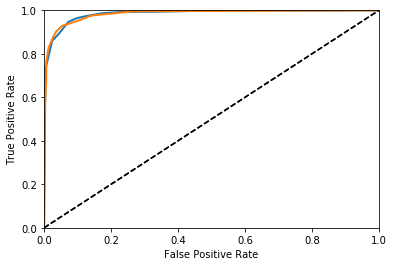

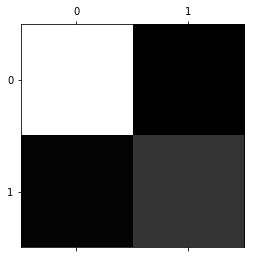

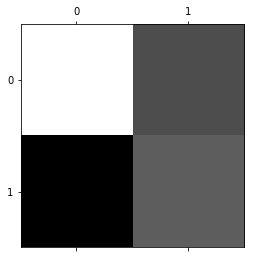

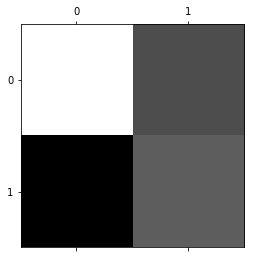

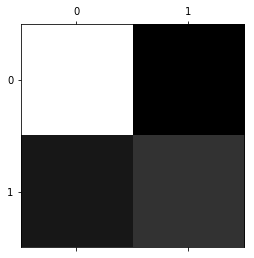

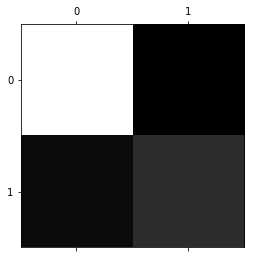

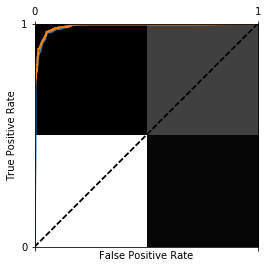

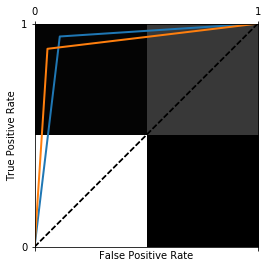

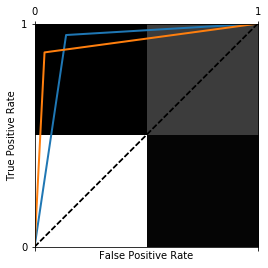

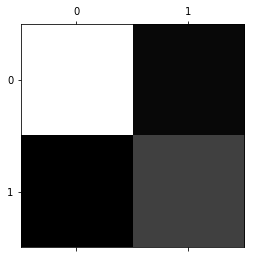

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=13)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")

rf = OneVsOneClassifier(rf)
do_test_forest_ovo(rf)

print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
do_test_forest_ovo(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)

print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_svm(knn)

print("-----Neural Network-----")
nn = MLPClassifier()
do_test_svm(nn)

print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)


In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----OvR Classifier Random Forest------")
rf = RandomForestClassifier()
rf = OneVsRestClassifier(rf)
rf.fit(x_train, y_train)

-----OvR Classifier Random Forest------


OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

In [21]:
import operator
rf.fit(x_train, y_train)
predictions = rf.predict_proba(x_test)
dec = []
for p in predictions:
    index, value = max(enumerate(p), key=operator.itemgetter(1))
    dec.append(index)

In [22]:
i = 0
for i in range(0, len(predictions)):
    if(dec[i] != y_test.values[i]):
        print("Predicted: -> "+ str(dec[i]) + "\nReal: " + str(y_test.values[i]) + "\n\t" + str(predictions[i]))

Predicted: -> 0
Real: 1
	[0.5 0.5]
Predicted: -> 0
Real: 1
	[0.5 0.5]
Predicted: -> 0
Real: 1
	[0.5 0.5]
Predicted: -> 1
Real: 0
	[0.3 0.7]
Predicted: -> 0
Real: 1
	[0.7 0.3]
Predicted: -> 0
Real: 1
	[0.8 0.2]
Predicted: -> 1
Real: 0
	[0.3 0.7]
Predicted: -> 1
Real: 0
	[0.2 0.8]
Predicted: -> 1
Real: 0
	[0.3 0.7]
Predicted: -> 0
Real: 1
	[0.5 0.5]
Predicted: -> 1
Real: 0
	[0.4 0.6]
Predicted: -> 0
Real: 1
	[0.5 0.5]
Predicted: -> 0
Real: 1
	[0.6 0.4]
Predicted: -> 1
Real: 0
	[0.4 0.6]
Predicted: -> 0
Real: 1
	[0.7 0.3]
Predicted: -> 0
Real: 1
	[0.8 0.2]


/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

	CrossValScore: 0.942609601980327
[[155  11]
 [  6  42]]

Accuracy train set: 0.955503512880562
Accuracy test set: 0.9205607476635514


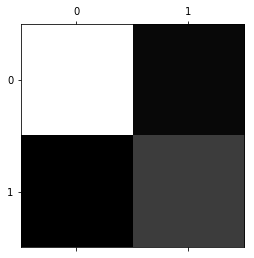

In [29]:
nn = MLPClassifier(random_state=321)
do_test_svm(nn)

In [24]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "random_state": list(range(0,100))
}
clf_grid = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=8)

/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
clf_grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, scor

In [26]:

print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)

-----------------Original Features--------------------
Best score: 0.9496
Using the following parameters:
{'random_state': 22}


[[162   4]
 [  5  43]]

Accuracy train set: 1.0
Accuracy test set: 0.9579439252336449


['../models/brVsvid_best.sav']

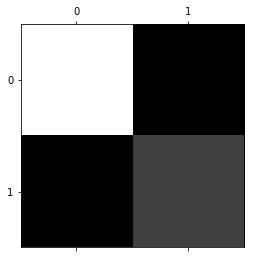

In [30]:
from sklearn.externals import joblib
nn = RandomForestClassifier(random_state=72)
model = AdaBoostClassifier(nn)
'''
y_probas_video = cross_val_predict(model, x_train, y_train_video, cv=10, method="predict_proba")
y_probas_browsing = cross_val_predict(model, x_train, y_train_browsing, cv=10, method="predict_proba")
y_scores_video = y_probas_video[:, 1]
y_scores_browsing = y_probas_browsing[:, 1]

fpr_v, tpr_v, thresholds_y = roc_curve(y_train_video, y_scores_video)
fpr_b, tpr_b, thresholds_n = roc_curve(y_train_browsing, y_scores_browsing)
plot_roc_curve(fpr_v, tpr_v, "Video")
plot_roc_curve(fpr_b, tpr_b, "Browsing")

cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
'''

model.fit(x_train, y_train)
predictions = model.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)

print(conf_mx)
print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

joblib.dump(model, '../models/brVsvid_best.sav')


In [28]:
sum(labels == 'video')

/home/agro/work/thesis/env/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison